In [1]:
import numpy as np
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize'] = [16,9]
np.random.seed(0)

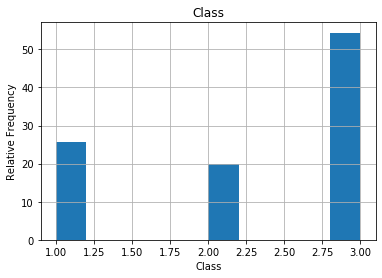

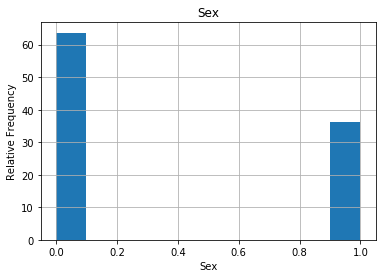

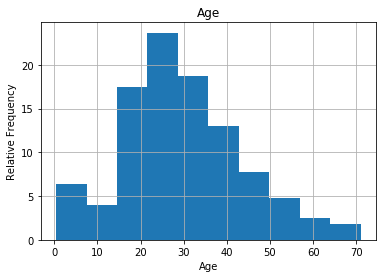

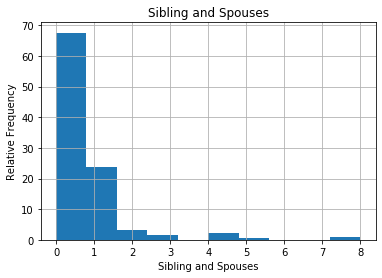

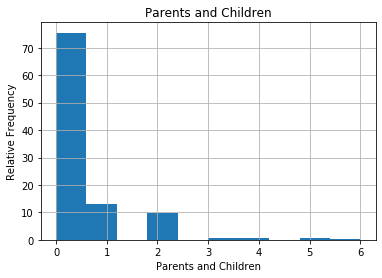

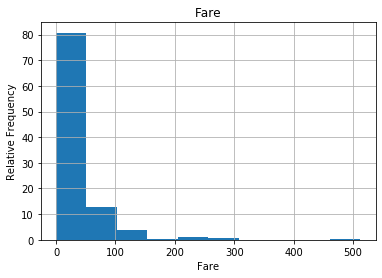

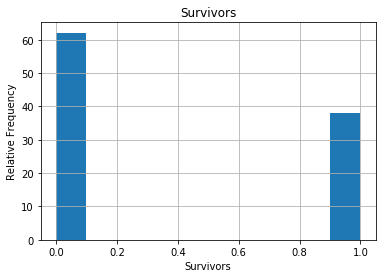

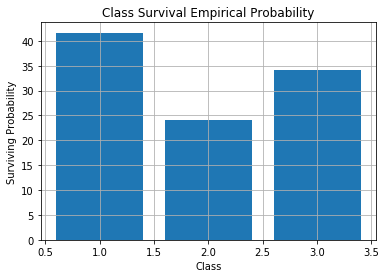

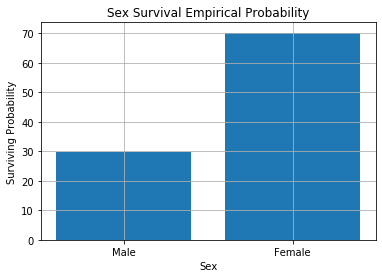

0 1


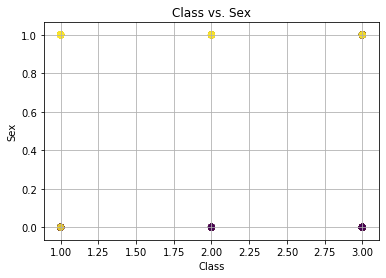

0 2


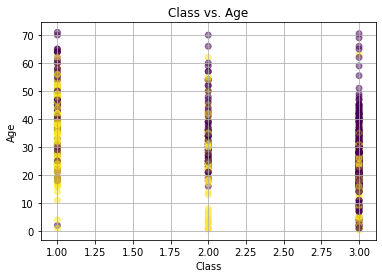

0 3


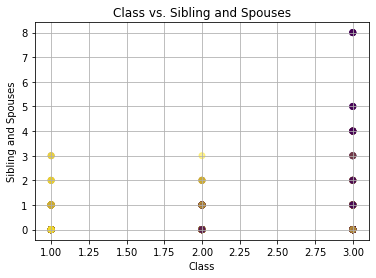

0 4


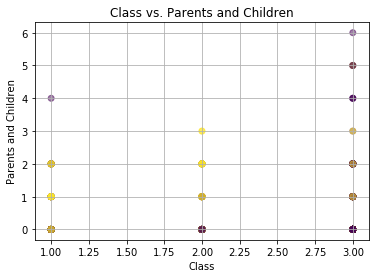

0 5


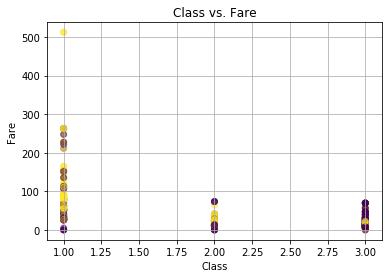

1 2


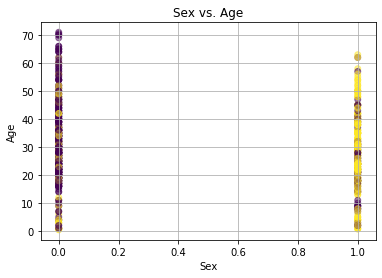

1 3


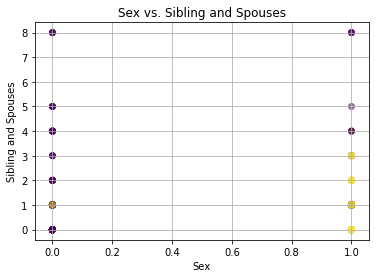

1 4


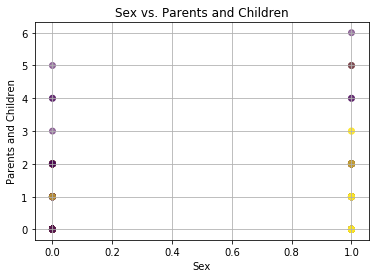

1 5


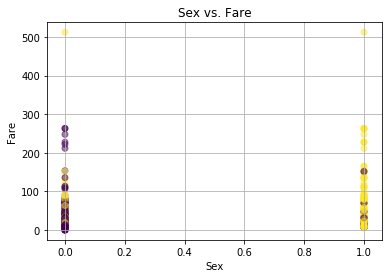

2 3


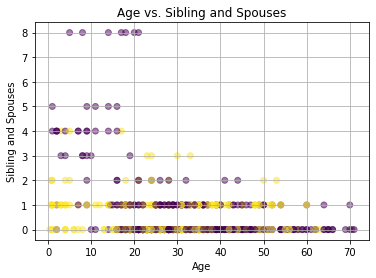

2 4


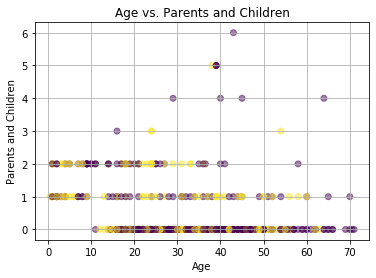

2 5


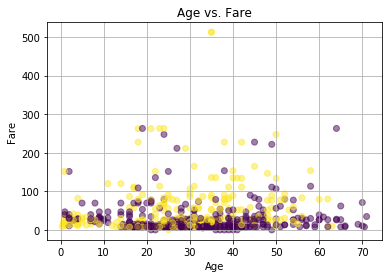

3 4


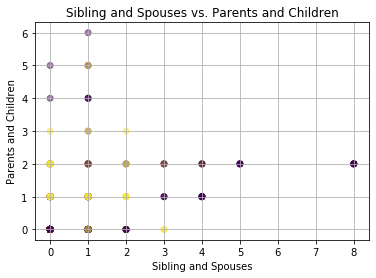

3 5


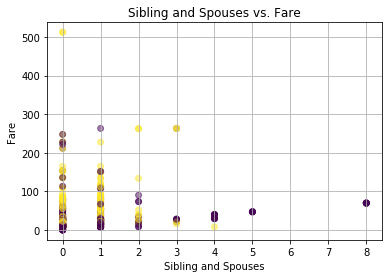

4 5


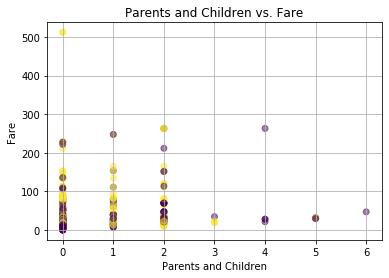

In [3]:
#Import Data
names=["Class", "Sex", "Age", "Sibling and Spouses", "Parents and Children" , "Fare", "Survivors"]
data = np.loadtxt("titanic-train.txt")
test_data = np.loadtxt("titanic-test.txt")
#print(test_data.shape)

for i in range(7):
    plt.title(names[i])
    plt.xlabel(names[i])
    plt.ylabel("Relative Frequency")
    plt.grid(1)
    plt.hist(data[:,i], weights=(np.zeros_like(data[:,i])+1./data[:,i].size)*100)
    plt.show()

cl=data[:,0]
sex=data[:,1]
surv=data[:,6]
a=np.zeros(3)
b=np.zeros(2)
for i in range(cl.size):
    if sex[i]==0 and surv[i]==1:
        b[0]+=1
    if sex[i]==1 and surv[i]==1:
        b[1]+=1
    if cl[i]==1 and surv[i]==1:
        a[0]+=1
    elif cl[i]==2 and surv[i]==1:
        a[1]+=1
    elif cl[i]==3 and surv[i]==1:
        a[2]+=1
        
#a[2]=cl.size-a[0]-a[1]
labc=[1,2,3]
labs=["Male", "Female"]
a/=a.sum()/100
b*=100/b.sum()
plt.bar(labc,a)
plt.grid(1)
plt.title("Class Survival Empirical Probability")
plt.xlabel("Class")
plt.ylabel("Surviving Probability")
plt.show()
plt.bar(labs,b)
plt.grid(1)
plt.title("Sex Survival Empirical Probability")
plt.xlabel("Sex")
plt.ylabel("Surviving Probability")
plt.show()
#Plot Data Correlation
for i in range(6):
    for j in range(i+1,6):
        print(i,j)
        plt.title(names[i] + " vs. " + names[j])
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        plt.scatter(data[:,i], data[:,j], c=data[:,6], alpha=0.5)
        plt.grid(1)
        plt.show()

In [18]:
#Logistic Regression Functions

def sigmoid(z):
    return 1./(1.+np.exp(-z))

def logreg_inference(x,w,b):
    return sigmoid(x@w+b)

def cross_entropy(p,y):
    return (-y*np.log(p)-(1-y)*np.log(1-p)).mean()

def logreg_train(x, y, epochs, lr,l, x_t,y_t):
    m,n=x.shape
    w=np.zeros(n)
    b=0
    n=0
    print("Steps  Loss  Accuracy")
    oldaccuracy=1
    oldloss=100
    for step in range(epochs):
        p=logreg_inference(x,w,b)
        loss=cross_entropy(p,y)
        predictions=(p>0.5)
        accuracy=(predictions==y).mean()
        pt=logreg_inference(x_t,w,b)
        losst=cross_entropy(pt,y_t)
        if step%50000==0:
            #print(step, loss)
            print(step, loss, losst, accuracy*100)
        '''
        if(np.abs(oldloss-loss)<1e-15):
            n+=0.1
            if(n>=4):
                print("Early Stopping at step ", step)
                break
        '''
        grad_b=(p-y).mean()
        grad_w=(x.T@(p-y))/m+l*np.sign(w)
        b-=lr*grad_b
        w-=lr*grad_w
        '''
        oldp=logreg_inference(x,w,b)
        oldloss=cross_entropy(oldp,y)
        oldpredictions=(oldp>0.5)
        oldaccuracy=(oldpredictions==y).mean()
        '''
    return w,b

#Assign Data and Labels
x=data[:,:6]
y=data[:,6]
x_t=test_data[:,:6]
y_t=test_data[:,6]

In [20]:
#Training
w,b = logreg_train(x,y, int(1e6),0.001,0., x_t,y_t)
p=logreg_inference(x,w,b)
predictions=(p>0.5)
accuracy=(predictions==y).mean()
print(accuracy*100)

Steps  Loss  Accuracy
0 0.6931471805599453 0.6931471805599453 62.112676056338024
50000 0.44371411984620157 0.49263511467459037 79.85915492957747
100000 0.43630511347662465 0.4907730866362463 80.14084507042254
150000 0.4335348472258169 0.4905015476814432 80.0
200000 0.4318000228658338 0.4904555714399237 80.28169014084507
250000 0.4306580231865976 0.4906559249067819 80.70422535211267
300000 0.42990188664290757 0.4910159449637962 80.42253521126761
350000 0.4293998629162345 0.4914495902055612 80.42253521126761
400000 0.429065690320056 0.4918988084759082 80.28169014084507
450000 0.4288427014600498 0.49232975111917104 80.42253521126761
500000 0.4286935716636919 0.4927249298684297 80.28169014084507
550000 0.4285936404938002 0.4930769976315363 80.28169014084507
600000 0.4285265627919005 0.49338456728527696 80.42253521126761
650000 0.4284814719340315 0.4936495576450827 80.42253521126761
700000 0.42845112358312076 0.49387555843321673 80.70422535211267
750000 0.4284306764253764 0.4940668483167461

[-0.97398596  2.76847753 -0.03290549 -0.3023238  -0.09865615  0.00367901] 1.5634614668927844
0 1


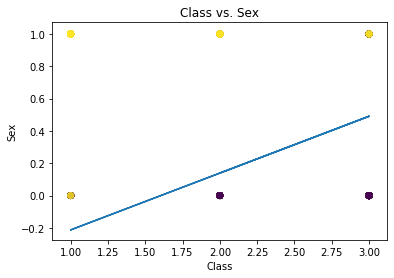

0 2


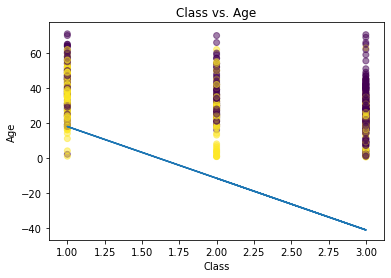

0 3


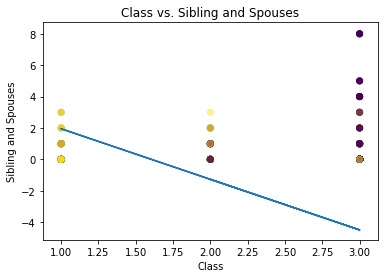

0 4


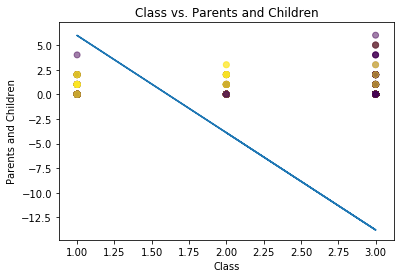

0 5


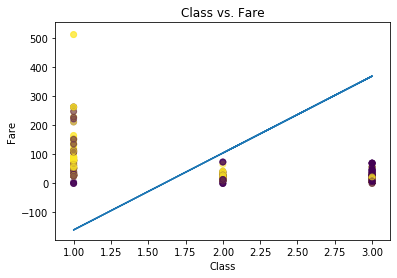

1 2


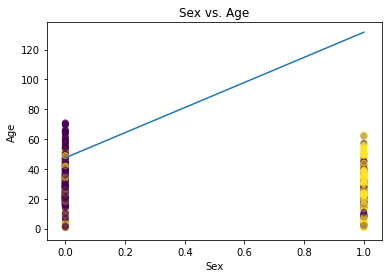

1 3


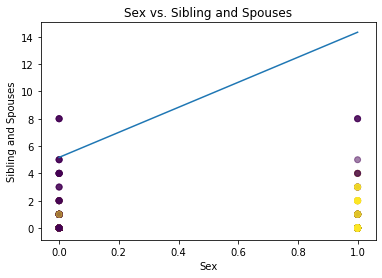

1 4


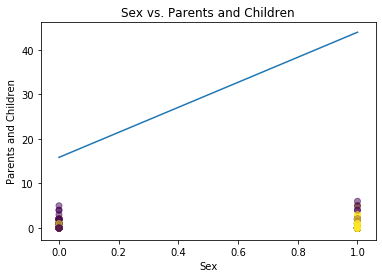

1 5


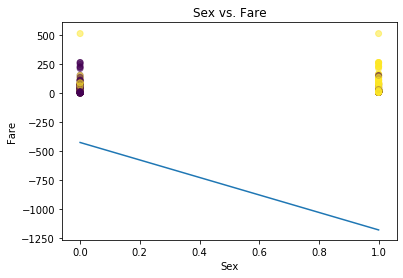

2 3


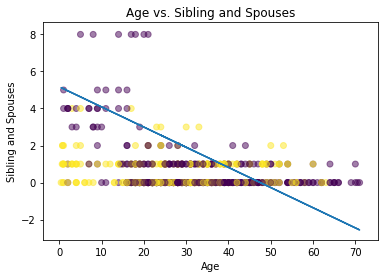

2 4


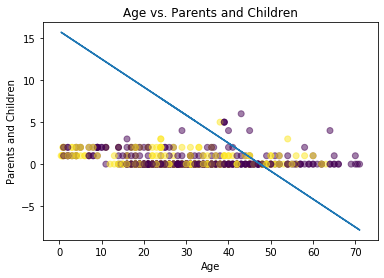

2 5


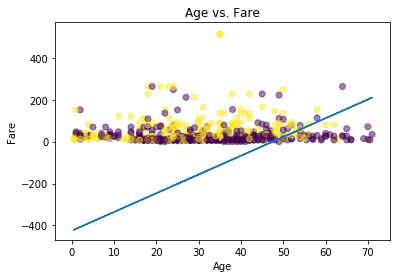

3 4


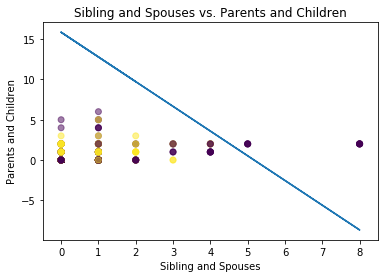

3 5


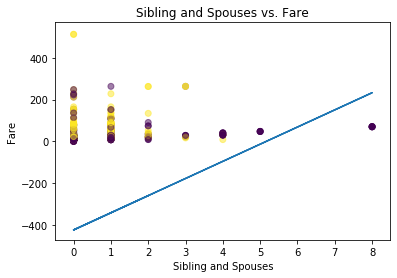

4 5


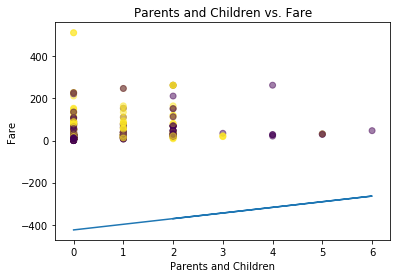

In [6]:
#Results on the Training Set
print(w,b)

for i in range(6):
    for j in range(i+1,6):
        print(i,j)
        plt.title(names[i] + " vs. " + names[j])
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        decision_bound=-w[i]/w[j]*data[:,i]-b/w[j]
        plt.plot(data[:,i], decision_bound, label="Decision Bound")
        plt.scatter(data[:,i], data[:,j], c=data[:,6], alpha=0.5, label="Data")
        plt.show()

In [7]:
#Guess a Survival Probability
guess_data=np.zeros((1,6))

for i in range(5):
    guess_data[0][i]=np.random.randint(data[:,i].min(), data[:,i].max())

guess_data[0][5]=(data[:,5].max()-data[:,5].min())*np.random.rand()+data[:,5].min()
print(guess_data)

prob_guess=logreg_inference(guess_data,w,b)
print("Random Guess: ", prob_guess*100)

#Educated Guess

guess_data[0][0]=1
guess_data[0][1]=1
prob_guess=logreg_inference(guess_data,w,b)
print("Educated Guess: ",prob_guess*100)

[[  1.           0.          47.           5.           0.
  308.81327825]]
Random Guess:  [20.87338058]
Educated Guess:  [80.78193854]


(177, 7)
79.09604519774011
0 1


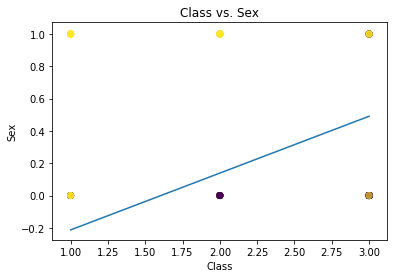

0 2


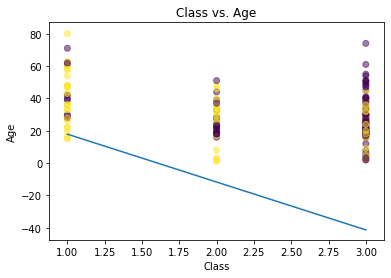

0 3


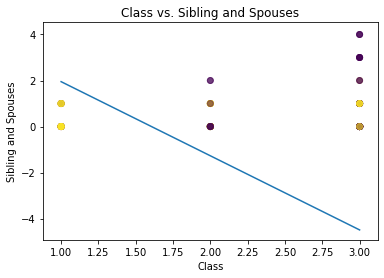

0 4


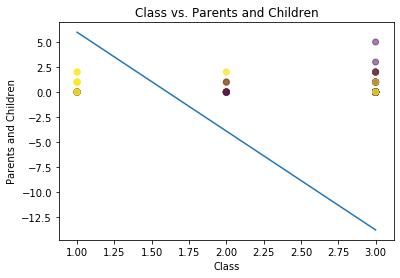

0 5


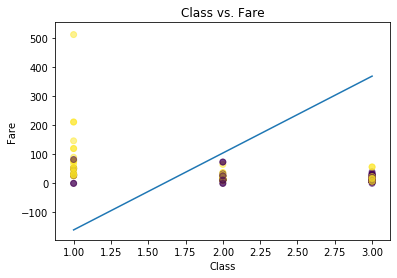

1 2


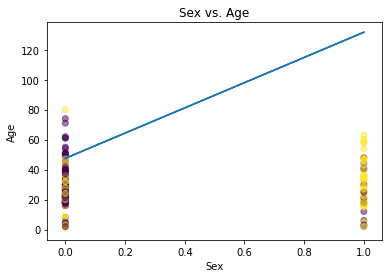

1 3


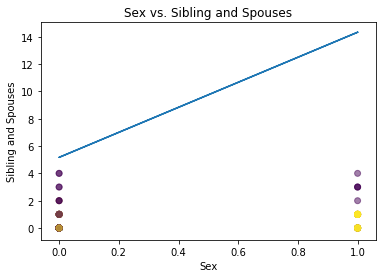

1 4


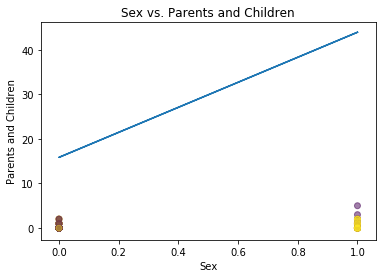

1 5


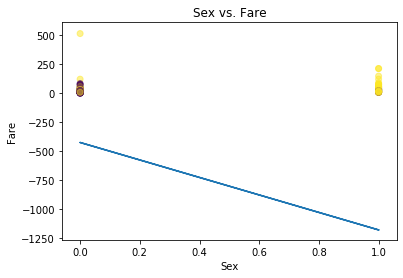

2 3


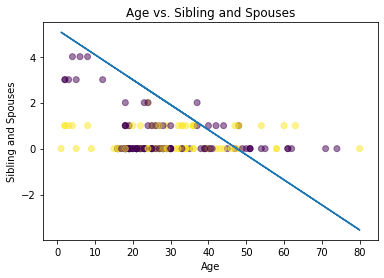

2 4


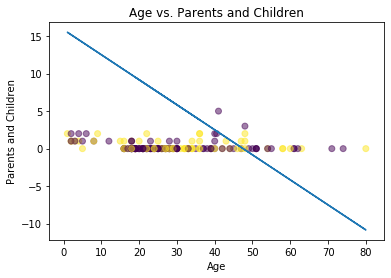

2 5


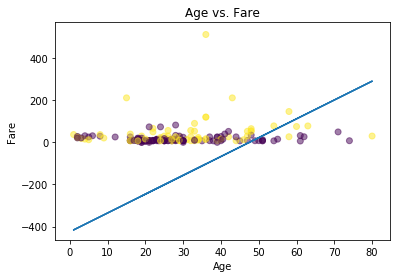

3 4


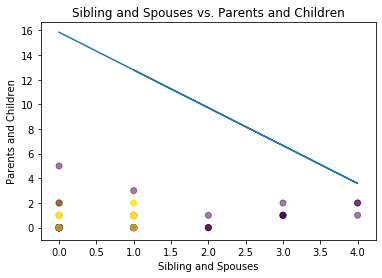

3 5


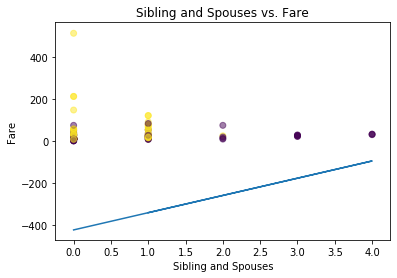

4 5


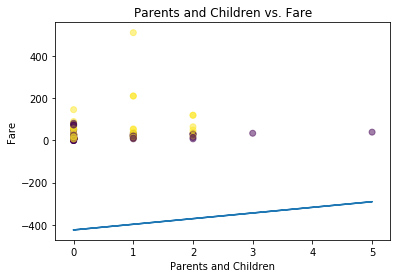

In [8]:
#Evaluate the model on test data
p=logreg_inference(x_t,w,b)
predictions=(p>0.5)
accuracy=(predictions==y_t).mean()
print(accuracy*100)

for i in range(6):
    for j in range(i+1,6):
        print(i,j)
        plt.title(names[i] + " vs. " + names[j])
        plt.xlabel(names[i])
        plt.ylabel(names[j])
        decision_bound=-w[i]/w[j]*test_data[:,i]-b/w[j]
        plt.plot(test_data[:,i], decision_bound, label="Decision Bound")
        plt.scatter(test_data[:,i], test_data[:,j], c=test_data[:,6], alpha=0.5, label="Data")
        plt.show()